# Prepare and Analyze the Superstore Dataset

**==========================================================================================================**

## Project Description / Business Task

In the project, you'll be making your way through the first two phases of the data analysis framework, which includes preparing and analyzing your data.

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import datetime
from datetime import datetime, timedelta, date

import scipy
from scipy import stats


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("order.csv", encoding="unicode_escape", parse_dates=["Order Date"])

**==========================================================================================================**

## Data Quick Glance

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-08-11,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-12-06,16/6/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-11-10,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-11-10,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.dtypes.value_counts()

object            14
int64              3
float64            3
datetime64[ns]     1
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,55190.38,229.86,3.79,0.16,28.66
std,2885.16,32063.69,623.25,2.23,0.21,234.26
min,1.00,1040.00,0.44,1.00,0.00,-6599.98
25%,2499.25,23223.00,17.28,2.00,0.00,1.73
50%,4997.50,56430.50,54.49,3.00,0.20,8.67
75%,7495.75,90008.00,209.94,5.00,0.20,29.36
max,9994.00,99301.00,22638.48,14.00,0.80,8399.98


In [7]:
# Descriptive Statistical Analysis
df.describe(include="object")

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,16/12/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [9]:
df.shape

(9994, 21)

In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
df.duplicated().sum()

0

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

**==========================================================================================================**

## Groupby

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.

In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [13]:
df.groupby(["Region"], as_index=True).sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,,
Central,11685963,151786150,501239.89,8780,558.34,39706.36
East,14073919,50171698,678781.24,10618,414.00,91522.78
South,8213295,55875052,391721.91,6209,238.55,46749.43
West,15971838,293739752,725457.82,12266,350.20,108418.45


In [14]:
df.groupby(["Region"], as_index=True)["Quantity"].count()

Region
Central    2323
East       2848
South      1620
West       3203
Name: Quantity, dtype: int64

In [15]:
108418.45 / 3203

33.84903215735248

In [16]:
# What is the average profit per item for the West region?

df.groupby(["Region"], as_index=True).mean()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,,
Central,5030.55,65340.57,215.77,3.78,0.24,17.09
East,4941.69,17616.47,238.34,3.73,0.15,32.14
South,5069.94,34490.77,241.80,3.83,0.15,28.86
West,4986.52,91707.70,226.49,3.83,0.11,33.85


In [17]:
# Calculate average profit per item for West region
avg_profit_per_item_west = df[df["Region"] == "West"]["Profit"].mean() / df[df["Region"] == "West"]["Quantity"].mean()

In [18]:
avg_profit_per_item_west

8.838940885374205

In [19]:
# You are now interested in examining the profit earned by the top five states in the East 
# region based on sales. To get started, take the following steps:

# Build a table to show the average Profit for each State
# Then, create two independent filters: Region: East, State: Top 5 in average Sales

In [20]:
df2 = df[['State', 'Region', 'Profit']]

In [21]:
df2.head()

,State,Region,Profit
0,Kentucky,South,41.91
1,Kentucky,South,219.58
2,California,West,6.87
3,Florida,South,-383.03
4,Florida,South,2.52


In [22]:
df2A = df2.groupby(['Region', 'State'], as_index=False)["Profit"].mean()
df2A

,Region,State,Profit
0,Central,Illinois,-25.63
1,Central,Indiana,123.38
2,Central,Iowa,39.46
3,Central,Kansas,34.85
4,Central,Michigan,95.93
5,Central,Minnesota,121.61
6,Central,Missouri,97.52
7,Central,Nebraska,53.61
8,Central,North Dakota,32.88
9,Central,Oklahoma,73.54


In [23]:
df2_east = df2A[df2A["Region"] == "East"]
df2_east

,Region,State,Profit
13,East,Connecticut,42.82
14,East,Delaware,103.93
15,East,District of Columbia,105.96
16,East,Maine,56.81
17,East,Maryland,66.96
18,East,Massachusetts,50.26
19,East,New Hampshire,63.20
20,East,New Jersey,75.18
21,East,New York,65.64
22,East,Ohio,-36.19


In [24]:
df2_east.sort_values(by="Profit", ascending=False).head()

,Region,State,Profit
25,East,Vermont,204.09
24,East,Rhode Island,130.10
15,East,District of Columbia,105.96
14,East,Delaware,103.93
20,East,New Jersey,75.18


In [25]:
# Create a histogram for the Sales

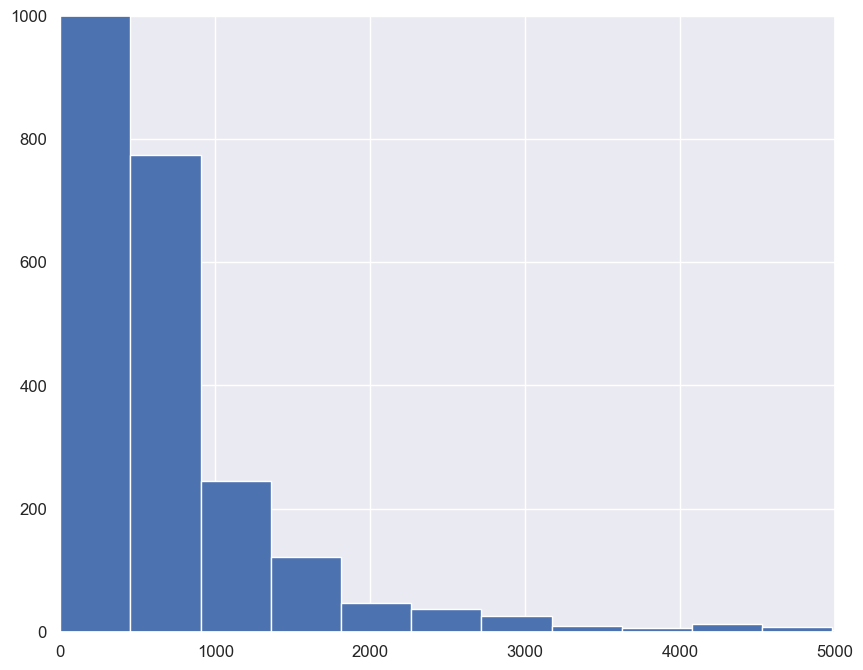

In [26]:
df.Sales.hist(bins=50, figsize=(10,8))
plt.xlim(0,5000)
plt.ylim(0,1000)
plt.show()

In [27]:
scipy.stats.skew(df.Sales, bias = True)

12.970805179533526

In [28]:
# How many orders had sales amounts that ranged between $150 and $200?

In [29]:
df.Sales

0      261.96
1      731.94
2       14.62
3      957.58
4       22.37
        ...  
9989    25.25
9990    91.96
9991   258.58
9992    29.60
9993   243.16
Name: Sales, Length: 9994, dtype: float64

In [30]:
filtered_df = df[(df['Sales'] >= 150) & (df['Sales'] <= 200)]
filtered_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
36,37,CA-2016-117590,2016-08-12,10/12/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.92,5,0.60,-147.96
68,69,CA-2014-106376,2014-05-12,10/12/2014,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,Arizona,85234,West,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,167.97,4,0.20,62.99
88,89,CA-2016-159695,2016-05-04,10/4/2016,Second Class,GM-14455,Gary Mitchum,Home Office,United States,Houston,Texas,77095,Central,OFF-ST-10003442,Office Supplies,Storage,Eldon Portable Mobile Manager,158.37,7,0.20,13.86
118,119,US-2015-136476,2015-05-04,10/4/2015,Standard Class,GG-14650,Greg Guthrie,Corporate,United States,Bristol,Tennessee,37620,South,OFF-BI-10003650,Office Supplies,Binders,GBC DocuBind 300 Electric Binding Machine,157.79,1,0.70,-115.72
150,151,CA-2016-114489,2016-05-12,9/12/2016,Standard Class,JE-16165,Justin Ellison,Corporate,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002735,Office Supplies,Binders,GBC Prestige Therm-A-Bind Covers,171.55,5,0.00,80.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,9896,CA-2014-115049,2014-09-26,1/10/2014,Standard Class,MM-17920,Michael Moore,Consumer,United States,Chicago,Illinois,60623,Central,TEC-AC-10004859,Technology,Accessories,"Maxell Pro 80 Minute CD-R, 10/Pack",153.82,11,0.20,38.46
9922,9923,US-2017-162124,2017-06-05,10/5/2017,Standard Class,JF-15490,Jeremy Farry,Consumer,United States,Chicago,Illinois,60653,Central,TEC-AC-10001990,Technology,Accessories,Kensington Orbit Wireless Mobile Trackball for...,191.97,4,0.20,28.80
9926,9927,CA-2015-159534,2015-03-20,23/3/2015,First Class,DH-13075,Dave Hallsten,Corporate,United States,New York City,New York,10035,East,TEC-PH-10002310,Technology,Phones,Panasonic KX T7731-B Digital phone,199.98,2,0.00,53.99
9933,9934,CA-2014-166555,2014-11-07,14/7/2014,First Class,JK-15205,Jamie Kunitz,Consumer,United States,Niagara Falls,New York,14304,East,TEC-PH-10004912,Technology,Phones,Cisco SPA112 2 Port Phone Adapter,164.85,3,0.00,47.81


In [31]:
num_orders = len(filtered_df)
num_orders

499

In [32]:
# Create a box plot to show the total Sales for each state and use it to determine which value below represents the third quartile.

In [33]:
df3 = df.groupby("State", as_index=False)["Sales"].sum()
df3

,State,Sales
0,Alabama,19510.64
1,Arizona,35282.00
2,Arkansas,11678.13
3,California,457687.63
4,Colorado,32108.12
5,Connecticut,13384.36
6,Delaware,27451.07
7,District of Columbia,2865.02
8,Florida,89473.71
9,Georgia,49095.84


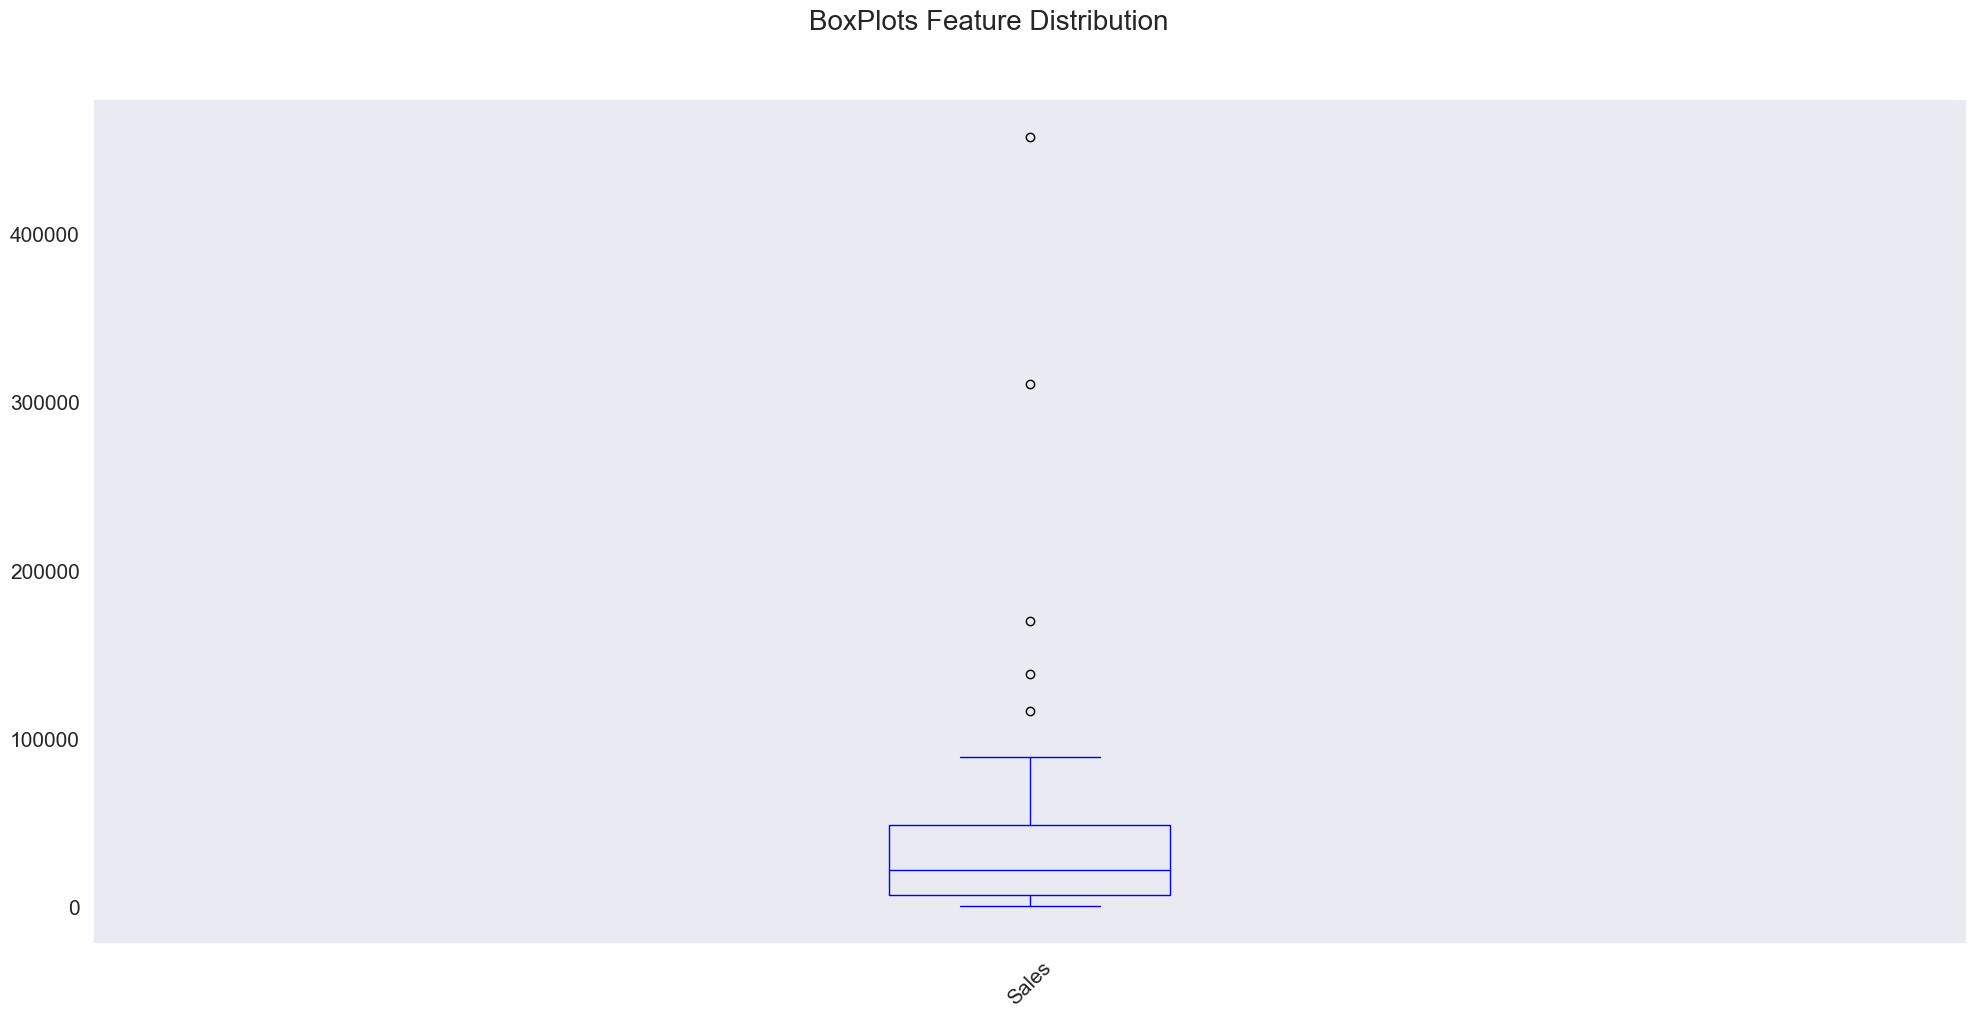

In [34]:
df3.boxplot(figsize=(20,10), color='blue', fontsize=15, grid=False)
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
df3.describe()

,Sales
count,49.00
mean,46881.65
std,80776.29
min,919.91
25%,7464.93
50%,22205.15
75%,49095.84
max,457687.63


In [36]:
# As you know, the Superstore dataset comes with a Region field, 
# but suppose you would like to define new regions: Northeast, Northwest, Southwest, and Southeast.

In [37]:
# Build a map by using the State field. 

In [38]:
# Create four groups, one for each of the regions listed below (you might consider using the image below to help you quickly create the groups, 
# rather than individually reading through the lists of states)

In [39]:
# Create a scatter plot with the average Discount on the x-axis and average Quantity on the y-axis, 
# and set the level of detail to Sub-Category.

In [40]:
df4 = df.groupby('Sub-Category', as_index=False)['Quantity','Discount'].mean()
df4

,Sub-Category,Quantity,Discount
0,Accessories,3.84,0.08
1,Appliances,3.71,0.17
2,Art,3.77,0.07
3,Binders,3.92,0.37
4,Bookcases,3.81,0.21
5,Chairs,3.82,0.17
6,Copiers,3.44,0.16
7,Envelopes,3.57,0.08
8,Fasteners,4.21,0.08
9,Furnishings,3.72,0.14


In [41]:
# Create a scatter plot with the average Discount on the x-axis and average Quantity on the y-axis, 
# and set the level of detail to Sub-Category.
# What is the R-squared value?

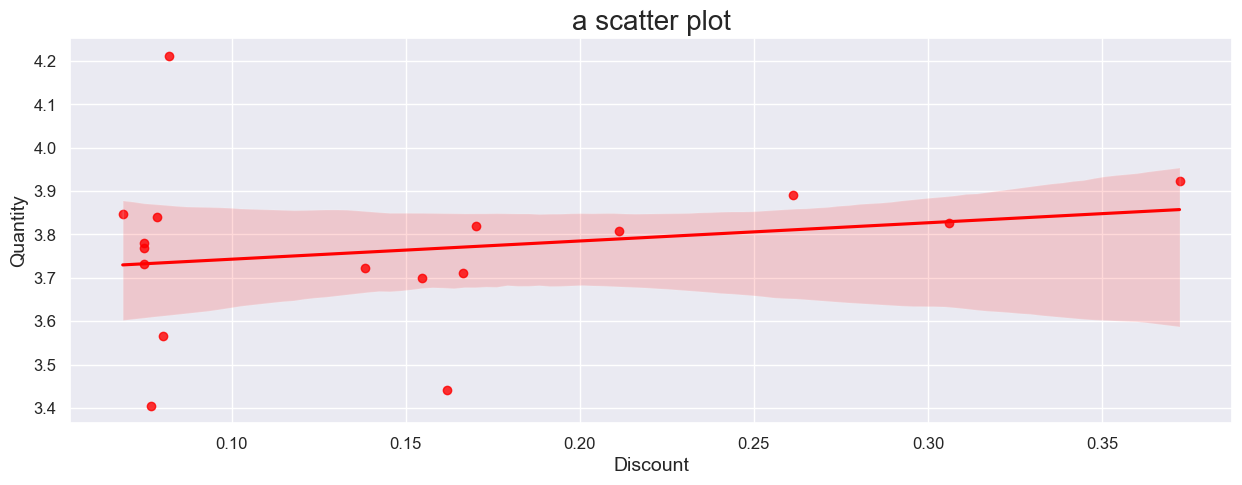

In [42]:
plt.figure(figsize=(15, 5))
sns.regplot(x='Discount', y='Quantity', data=df4, color='red')
plt.title("a scatter plot", size=20)
plt.show()

In [43]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df4.Discount, y=df4.Quantity)

In [44]:
r_value

0.20858113963651878

In [45]:
# Build a table to show both the Category and Sub-Category as rows, showing the total Sales for each.

In [46]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [47]:
df5 = df.groupby(["Category", "Sub-Category"], as_index=False)["Sales"].sum()
df5

,Category,Sub-Category,Sales
0,Furniture,Bookcases,114880.00
1,Furniture,Chairs,328449.10
2,Furniture,Furnishings,91705.16
3,Furniture,Tables,206965.53
4,Office Supplies,Appliances,107532.16
5,Office Supplies,Art,27118.79
6,Office Supplies,Binders,203412.73
7,Office Supplies,Envelopes,16476.40
8,Office Supplies,Fasteners,3024.28
9,Office Supplies,Labels,12486.31


In [48]:
# Add a quick table calculation to show the "Percent of Total."

In [49]:
df5["Percent of Total"] = df5.groupby("Category")["Sales"].transform(lambda x: x / x.sum() * 100)

In [50]:
df5

,Category,Sub-Category,Sales,Percent of Total
0,Furniture,Bookcases,114880.00,15.48
1,Furniture,Chairs,328449.10,44.27
2,Furniture,Furnishings,91705.16,12.36
3,Furniture,Tables,206965.53,27.89
4,Office Supplies,Appliances,107532.16,14.95
5,Office Supplies,Art,27118.79,3.77
6,Office Supplies,Binders,203412.73,28.29
7,Office Supplies,Envelopes,16476.40,2.29
8,Office Supplies,Fasteners,3024.28,0.42
9,Office Supplies,Labels,12486.31,1.74


In [51]:
# What is the total sales from the "Office Supplies" sub-category?

In [52]:
df6 = df5[df5.Category == "Office Supplies"]
df6

,Category,Sub-Category,Sales,Percent of Total
4,Office Supplies,Appliances,107532.16,14.95
5,Office Supplies,Art,27118.79,3.77
6,Office Supplies,Binders,203412.73,28.29
7,Office Supplies,Envelopes,16476.40,2.29
8,Office Supplies,Fasteners,3024.28,0.42
9,Office Supplies,Labels,12486.31,1.74
10,Office Supplies,Paper,78479.21,10.91
11,Office Supplies,Storage,223843.61,31.13
12,Office Supplies,Supplies,46673.54,6.49


In [53]:
df6.Sales.sum()

719047.0319999999

In [54]:
#Create a time-series plot using the Order Date and average Profit.

In [55]:
df7 = df[["Order Date", "Profit"]]
df7

,Order Date,Profit
0,2016-08-11,41.91
1,2016-08-11,219.58
2,2016-12-06,6.87
3,2015-11-10,-383.03
4,2015-11-10,2.52
...,...,...
9989,2014-01-21,4.10
9990,2017-02-26,15.63
9991,2017-02-26,19.39
9992,2017-02-26,13.32


In [56]:
#data_list = df7.values.tolist()

In [57]:
df7["Year"] = df7["Order Date"].dt.year

In [58]:
df7

,Order Date,Profit,Year
0,2016-08-11,41.91,2016
1,2016-08-11,219.58,2016
2,2016-12-06,6.87,2016
3,2015-11-10,-383.03,2015
4,2015-11-10,2.52,2015
...,...,...,...
9989,2014-01-21,4.10,2014
9990,2017-02-26,15.63,2017
9991,2017-02-26,19.39,2017
9992,2017-02-26,13.32,2017


In [59]:
# Filter on the year 2016.

In [60]:
df8 = df7[df7["Year"] == 2016]

In [61]:
df8

,Order Date,Profit,Year
0,2016-08-11,41.91,2016
1,2016-08-11,219.58,2016
2,2016-12-06,6.87,2016
13,2016-05-12,132.59,2016
21,2016-09-12,5.06,2016
...,...,...,...
9978,2016-06-12,4.68,2016
9979,2016-06-12,153.12,2016
9982,2016-09-22,16.71,2016
9983,2016-09-22,27.43,2016


In [62]:
df8.reset_index(inplace=True, drop=True)

In [63]:
df8

,Order Date,Profit,Year
0,2016-08-11,41.91,2016
1,2016-08-11,219.58,2016
2,2016-12-06,6.87,2016
3,2016-05-12,132.59,2016
4,2016-09-12,5.06,2016
...,...,...,...
2582,2016-06-12,4.68,2016
2583,2016-06-12,153.12,2016
2584,2016-09-22,16.71,2016
2585,2016-09-22,27.43,2016


In [64]:
df8.describe()

,Profit,Year
count,2587.00,2587.00
mean,31.62,2016.00
std,280.78,0.00
min,-6599.98,2016.00
25%,1.88,2016.00
50%,8.74,2016.00
75%,28.86,2016.00
max,8399.98,2016.00


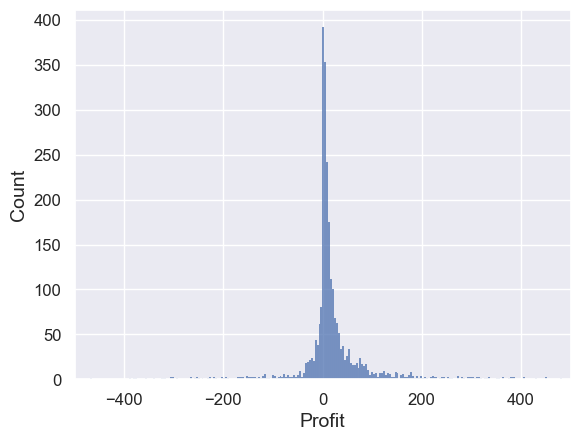

In [65]:
sns.histplot(df8.Profit)
plt.xlim((-500,500))
plt.show()

In [66]:
# What is the forecasted average profit for January 7, 2017? (Hint: Hover over January 7, 2017.)

In [67]:
alpha = 0.5

In [68]:
smoothed_profit = df8["Profit"].iloc[0]

In [69]:
smoothed_profit

41.9136

In [70]:
for i in range(1, len(df8)):
    smoothed_profit = alpha * df8["Profit"].iloc[i] + (1 - alpha) * smoothed_profit

In [71]:
smoothed_profit

26.610281640473623

In [72]:
forecast_date = pd.to_datetime("2017-01-07")
forecast_profit = smoothed_profit


In [73]:
forecast_profit

26.610281640473623

**==========================================================================================================**

**==========================================================================================================**

#### Python code done by Dennis Lam